In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
tips=px.data.tips()
iris=px.data.iris()
gap=px.data.gapminder()

In [3]:
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


# scatter plot using plotly go

In [4]:
temp_df=gap[gap['year']==2007]

In [5]:
trace1=go.Scatter(x=temp_df['lifeExp'],y=temp_df["gdpPercap"],mode="markers")

data=[trace1]

layout=go.Layout(title='Life exp vs gdp per cap for 2007',xaxis={"title":"life exp"},yaxis={'title':"gdp per cap"})

fig=go.Figure(data,layout)

fig.show()

In [6]:
trace1=go.Scatter(x=temp_df['lifeExp'],y=temp_df["gdpPercap"],mode="markers")
trace2=go.Scatter(x=temp_df['iso_num'],y=temp_df["pop"],mode="markers")

data=[trace1,trace2]

layout=go.Layout(title='Life exp vs gdp per cap for 2007',xaxis={"title":"life exp"},yaxis={'title':"gdp per cap"})

fig=go.Figure(data,layout)

fig.show()

# plotly express

In [7]:
px.scatter(temp_df,x="lifeExp",y="gdpPercap",color='continent',size="pop")

In [8]:
px.scatter(temp_df,x="lifeExp",y="gdpPercap",color='continent',size="pop",size_max=60,hover_name='country')

## animation

In [9]:
px.scatter(gap,x="lifeExp",y="gdpPercap",color='continent',
           size="pop",size_max=50,hover_name='country',
          animation_frame='year',animation_group='country',range_x=[10,95])

In [10]:
temp_df=gap[gap['country']=="India"]

In [11]:
px.line(temp_df,x="year",y="pop",title="India population growth")

In [12]:
# plotting line companrision of india china and pak life exp

temp_df=gap[gap['country'].isin(["India","China","Pakistan"])].pivot(index='year',columns='country',values='lifeExp')
px.line(temp_df,x=temp_df.index,y=temp_df.columns,title="Life expectency comparision")

In [13]:
# barchart india pop

temp_df=gap[gap["country"]=="India"]
px.bar(temp_df,x='year',y='pop',title="India population")

In [14]:
# barchart  stacked

temp_df=gap[gap['country'].isin(["India","China","Pakistan"])].pivot(index='year',columns='country',values='lifeExp')
px.bar(temp_df,x=temp_df.index,y=temp_df.columns,title="life exp over the years",text_auto=True)

In [15]:
# barchart  stacked

temp_df=gap[gap['country'].isin(["India","China","Pakistan"])].pivot(index='year',columns='country',values='lifeExp')
px.bar(temp_df,x=temp_df.index,y=temp_df.columns,title="life exp over the years",barmode='group',text_auto=True)

In [16]:


temp_df=gap[gap['country'].isin(["India","China","Pakistan"])].pivot(index='year',columns='country',values='pop')
px.bar(temp_df,x=temp_df.index,y=temp_df.columns,title="pop over the years",text_auto=True,barmode='group')

In [17]:
# barchart logy for bringing pak also a visible extent


temp_df=gap[gap['country'].isin(["India","China","Pakistan"])].pivot(index='year',columns='country',values='pop')
px.bar(temp_df,x=temp_df.index,y=temp_df.columns,title="pop over the years",text_auto=True,barmode='group',log_y=True)


In [18]:
# stacked bar chart by continent

temp_df=gap[gap['year']==2007]

px.bar(temp_df,x='continent',y='pop',color='country',title="pop of continent",text_auto=True,log_y=True,height=600)

In [19]:
# bar chart animation

px.bar(gap,x='continent',y='pop',animation_frame='year',animation_group='country',color='continent',height=500,log_y=True)

# histogram

In [20]:
gap[gap['year']==2007]
px.histogram(gap,x='lifeExp',text_auto=True)

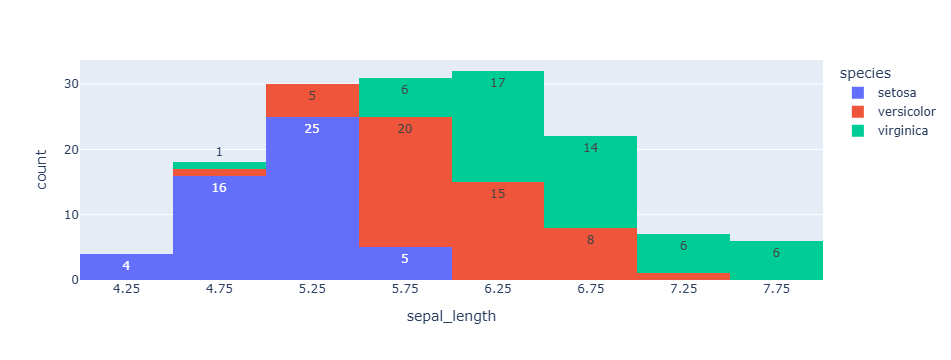

In [21]:
px.histogram(iris,x='sepal_length',color='species',text_auto=True)

# piechart

In [22]:
temp_df=gap[(gap['year']==2007) & (gap['continent']=='Europe')]
px.pie(temp_df,values='pop',names=temp_df['country'].values,height=500)

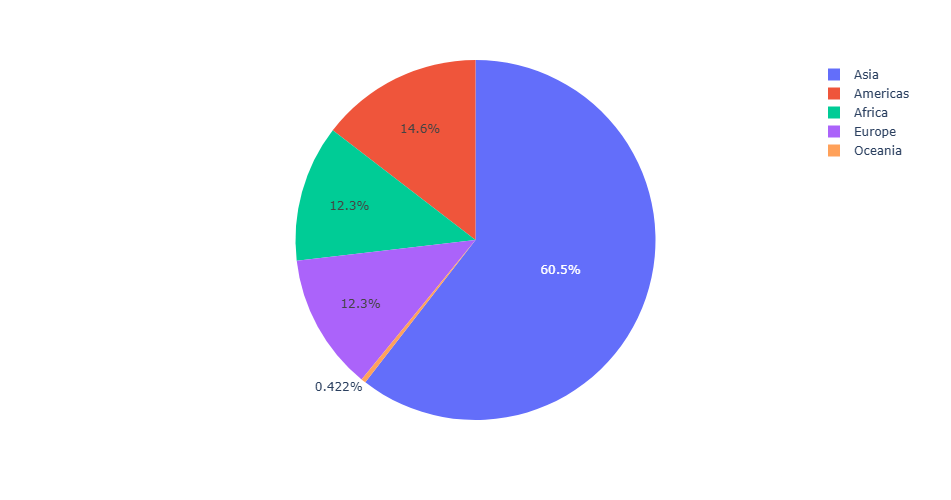

In [23]:
temp_df=gap.groupby('continent')['pop'].sum()
px.pie(temp_df,values='pop',names=temp_df.index,height=500)

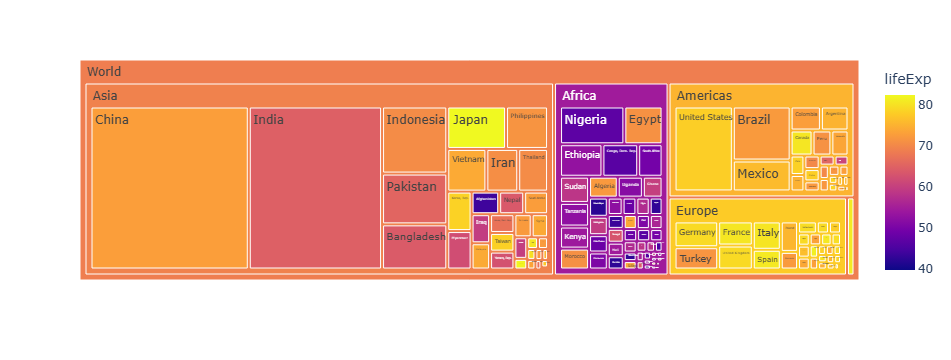

In [27]:
# tree map

temp_df=gap[gap['year']==2007]
px.treemap(temp_df,path=[px.Constant("World"),'continent','country'],values='pop',color='lifeExp')

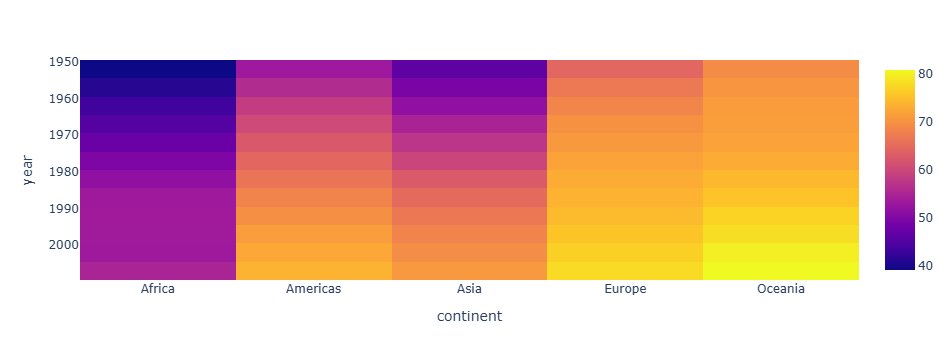

In [32]:
# heat map

pivot=gap.pivot_table(index='year',columns='continent',values='lifeExp',aggfunc='mean')

px.imshow(pivot)

# 3d scatter plot

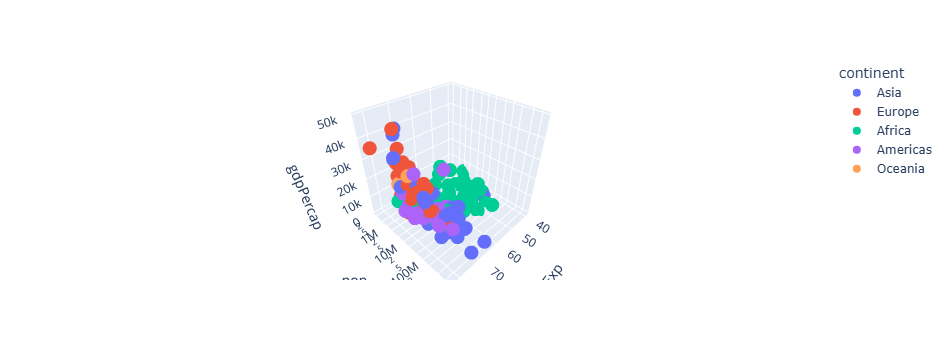

In [39]:
temp_df=gap[gap['year']==2007]

px.scatter_3d(temp_df,x='lifeExp',y='pop',z='gdpPercap',hover_name='country',log_y=True,color='continent')

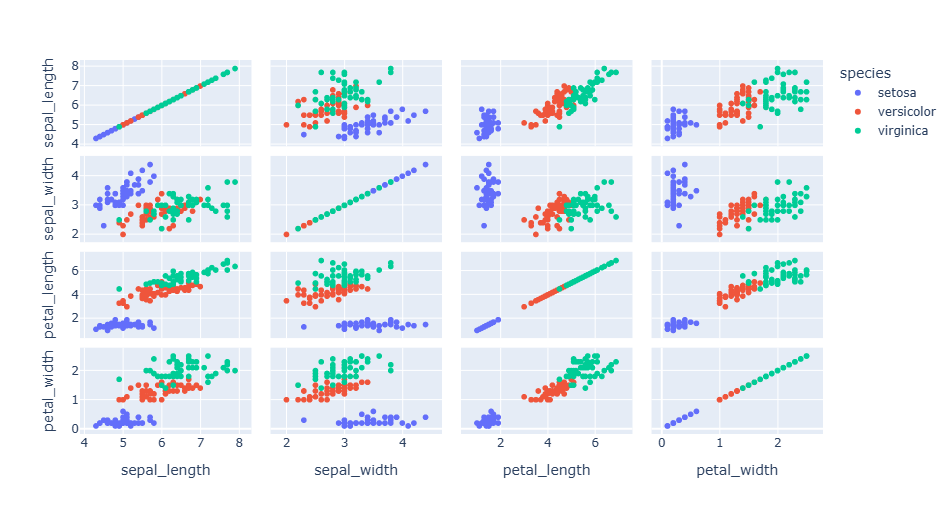

In [43]:
px.scatter_matrix(iris,dimensions=['sepal_length','sepal_width','petal_length','petal_width'],color='species',height=500,width=1200)

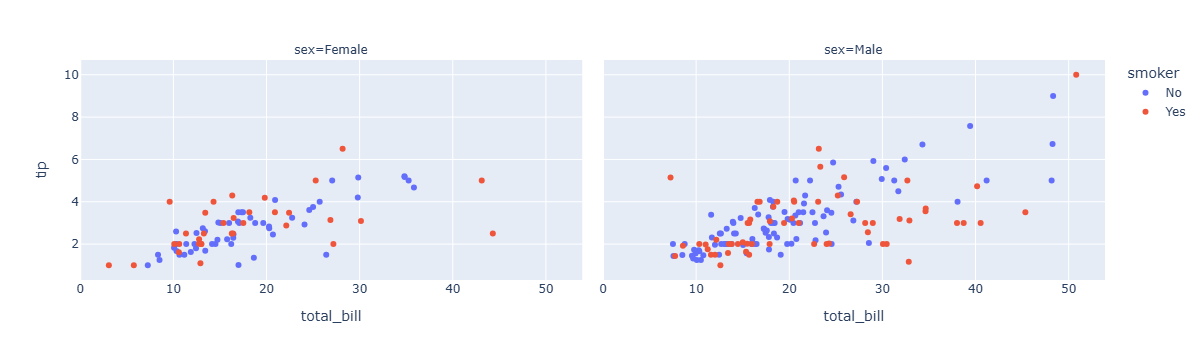

In [48]:
# facet plot
px.scatter(tips, x="total_bill", y="tip", color="smoker", facet_col="sex")

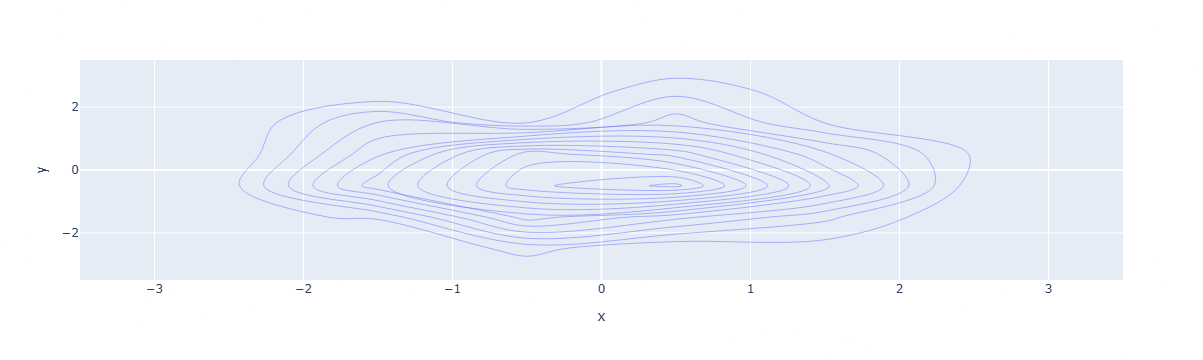

In [49]:
#contour plot
np.random.seed(0)
x = np.random.randn(200)
y = np.random.randn(200)
z = np.random.rand(200)

# Create the contour plot
fig = px.density_contour(x=x, y=y, z=z, histfunc="sum")
fig.show()